# Useful Insights

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df_merged = pd.read_csv(r"C:\Users\mnilo\OneDrive\Desktop\Courses\Master Project\NM_na_filled_road_accidents.csv", low_memory=False).set_index("new_key_unique")
df_merged

,accident_index,accident_reference,accident_severity,accident_year,age_band_of_casualty,age_band_of_driver,age_of_casualty,age_of_driver,age_of_vehicle,bus_or_coach_passenger,...,vehicle_direction_from,vehicle_direction_to,vehicle_leaving_carriageway,vehicle_left_hand_drive,vehicle_location_restricted_lane,vehicle_manoeuvre,vehicle_reference,vehicle_type,weather_conditions,age_group
new_key_unique,,,,,,,,,,,,,,,,,,,,,
2016010000005_2_1,2016010000005,010000005,Slight,2016,21 - 25,21 - 25,23.0,23.0,4,Not a bus or coach passenger,...,West,East,Did not leave carriageway,No,On main c'way - not in restricted lane,Going ahead other,2,Motorcycle 50cc and under,Fine no high winds,19-30
2016010000006_1_1,2016010000006,010000006,Slight,2016,36 - 45,36 - 45,36.0,36.0,1,Not a bus or coach passenger,...,South East,North,Nearside,No,On main c'way - not in restricted lane,Going ahead other,1,Car,Fine no high winds,31-45
2016010000008_1_1,2016010000008,010000008,Slight,2016,21 - 25,21 - 25,24.0,24.0,5,Not a bus or coach passenger,...,North,North West,Did not leave carriageway,No,On main c'way - not in restricted lane,Going ahead other,1,Car,Fine no high winds,19-30
2016010000016_1_1,2016010000016,010000016,Slight,2016,56 - 65,46 - 55,59.0,55.0,7,Standing passenger,...,South East,North,Did not leave carriageway,No,On main c'way - not in restricted lane,Going ahead other,1,Bus or coach (17 or more pass seats),Fine no high winds,46-60
2016010000018_2_1,2016010000018,010000018,Slight,2016,26 - 35,26 - 35,28.0,28.0,-1,Not a bus or coach passenger,...,South East,North,Did not leave carriageway,No,On main c'way - not in restricted lane,Going ahead other,2,Pedal cycle,Fine no high winds,19-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020991027064_2_1,2020991027064,991027064,Serious,2020,11 - 15,11 - 15,11.0,11.0,-1,Not a bus or coach passenger,...,North,South East,Did not leave carriageway,No,On main c'way - not in restricted lane,Moving off,2,Pedal cycle,Fine no high winds,0-18
2020991029573_1_1,2020991029573,991029573,Slight,2020,56 - 65,36 - 45,63.0,39.0,7,Not a bus or coach passenger,...,South East,North,Did not leave carriageway,No,Cycleway or shared use footway (not part of m...,Reversing,1,Car,Fine no high winds,31-45
2020991030297_2_1,2020991030297,991030297,Serious,2020,36 - 45,36 - 45,38.0,38.0,2,Not a bus or coach passenger,...,South West,North East,Did not leave carriageway,No,On main c'way - not in restricted lane,Going ahead left-hand bend,2,Motorcycle over 500cc,Fine no high winds,31-45


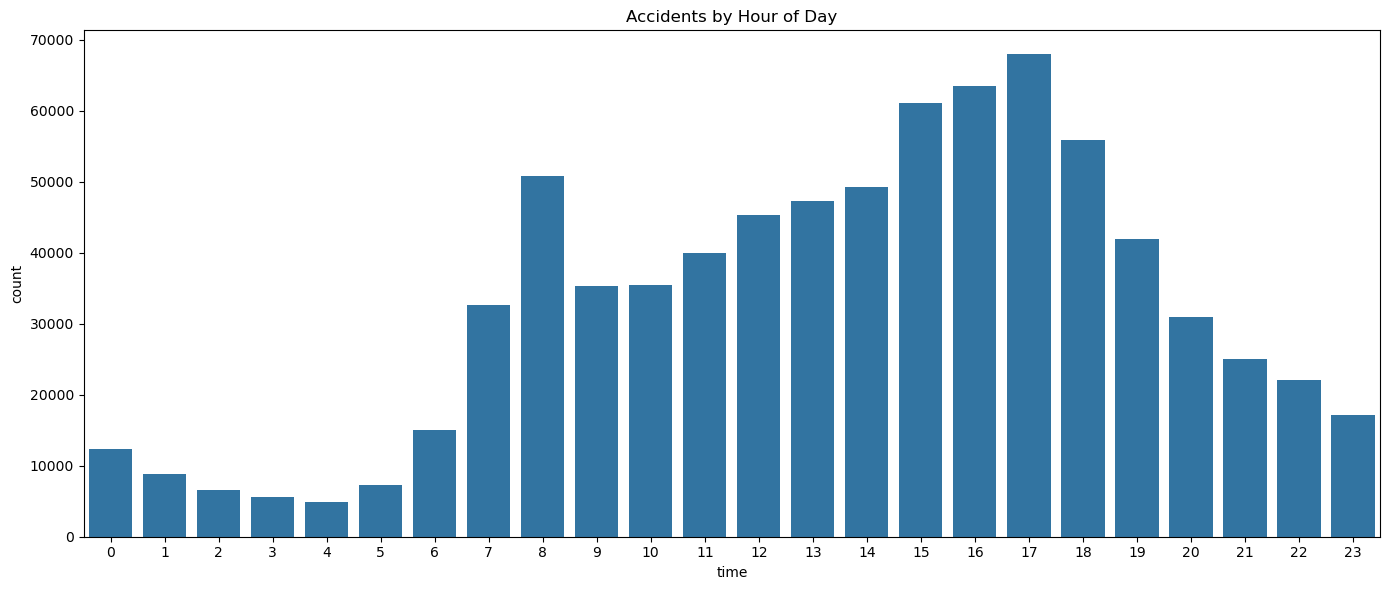

In [50]:
# Plot histogram for the 'time' column (accident distribution by hour)
fig, ax = plt.subplots(figsize=(14, 6))

# Plot count of accidents by hour of day
sns.countplot(x=df_merged['time'], ax=ax)
ax.set_title('Accidents by Hour of Day')
ax.set_xticks(range(24))  # Set x-axis ticks to represent the hours of the day

plt.tight_layout()
plt.show()


C:\Users\mnilo\AppData\Local\Temp\ipykernel_17696\2776724475.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


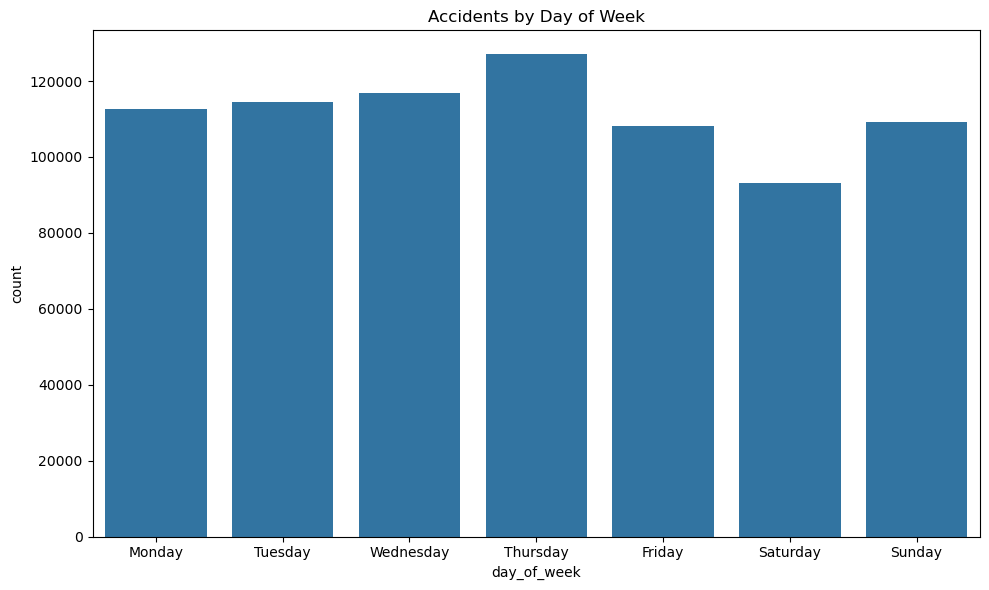

In [12]:
# Plot accidents by day of the week
fig, ax = plt.subplots(figsize=(10, 6))

# Plot count of accidents by day of the week
sns.countplot(x=df_merged['day_of_week'], ax=ax)
ax.set_title('Accidents by Day of Week')

# Set the x-axis labels to represent days of the week
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.tight_layout()
plt.show()


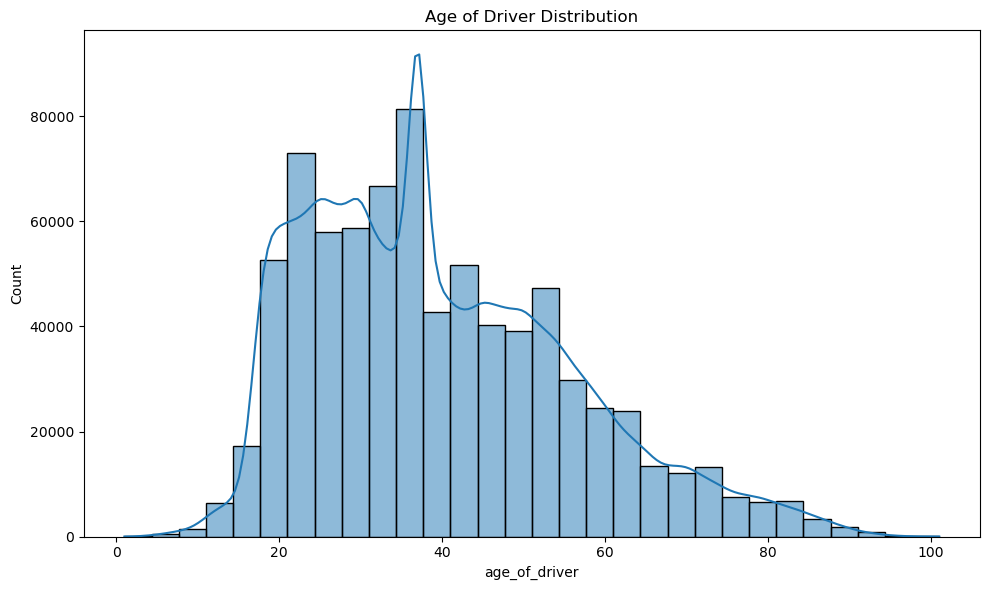

In [14]:
# Plot histogram for the age of the driver
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df_merged['age_of_driver'], bins=30, kde=True, ax=ax)
ax.set_title('Age of Driver Distribution')

plt.tight_layout()
plt.show()


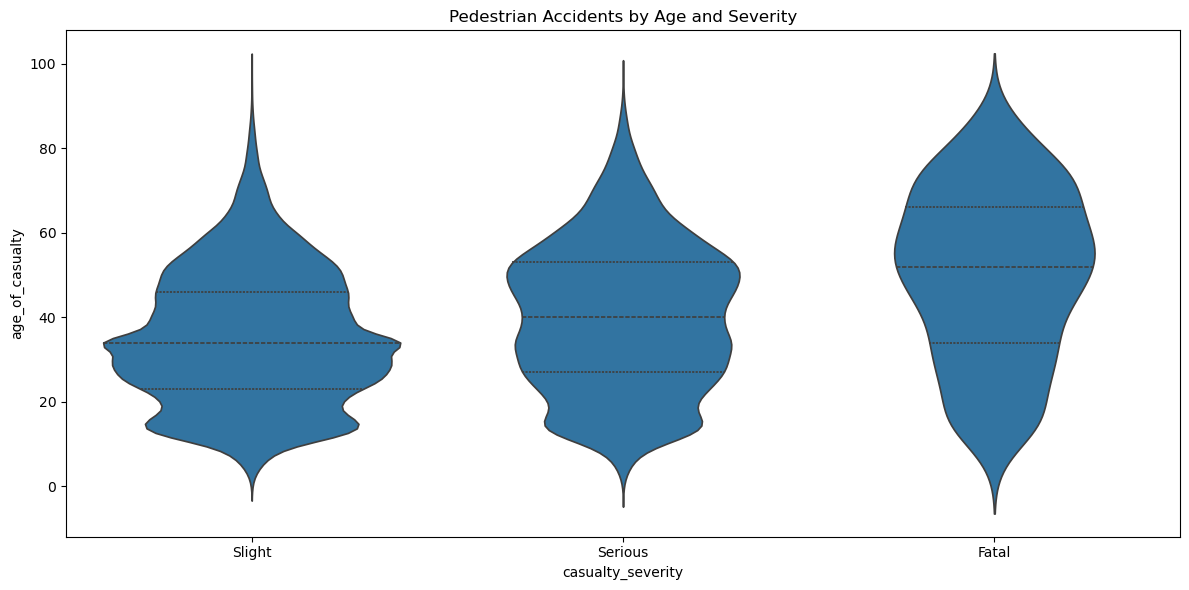

In [62]:
# Filter for pedestrian accidents
pedestrian_accidents = df_merged[df_merged['vehicle_type'] == 'Pedal cycle']

# Plot pedestrian accidents by age and severity using a violin plot
fig, ax = plt.subplots(figsize=(12, 6))

sns.violinplot(x='casualty_severity', y='age_of_casualty', data=pedestrian_accidents, ax=ax, inner="quart")
ax.set_title('Pedestrian Accidents by Age and Severity')

plt.tight_layout()
plt.show()


C:\Users\mnilo\AppData\Local\Temp\ipykernel_17696\2634928545.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='speed_limit', y='number_of_casualties', data=avg_casualties, ax=ax, palette="Blues_d")


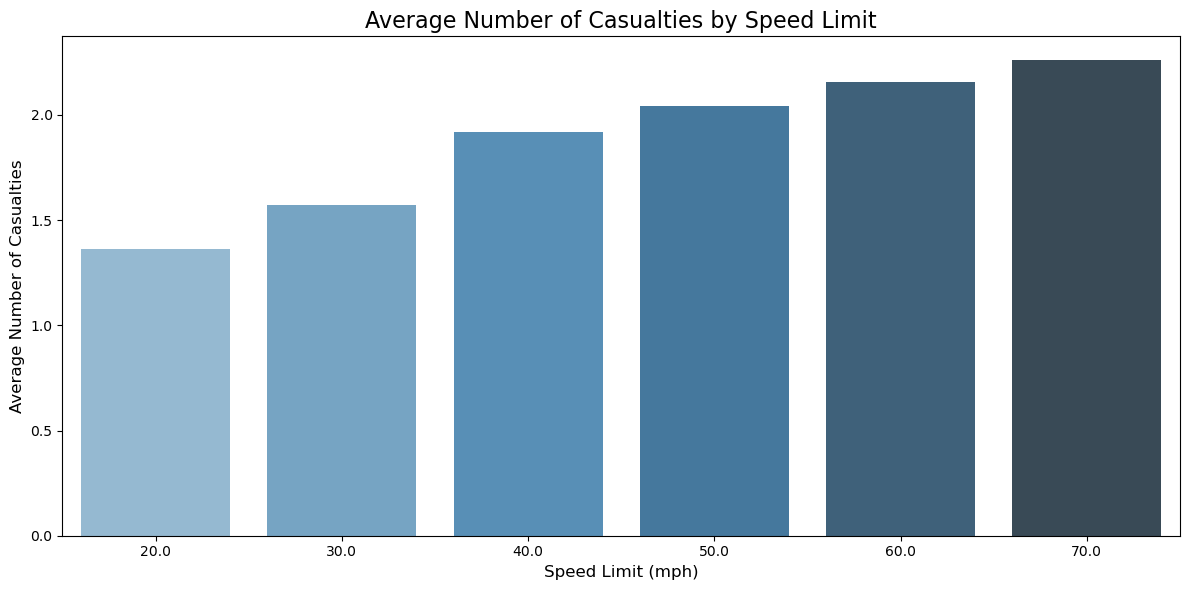

In [72]:
# Plot the relationship between speed limit and the average number of casualties
fig, ax = plt.subplots(figsize=(12, 6))

# Aggregate the data by speed limit and calculate the average number of casualties
avg_casualties = df_merged.groupby('speed_limit')['number_of_casualties'].mean().reset_index()

sns.barplot(x='speed_limit', y='number_of_casualties', data=avg_casualties, ax=ax, palette="Blues_d")

ax.set_title('Average Number of Casualties by Speed Limit', fontsize=16)
ax.set_xlabel('Speed Limit (mph)', fontsize=12)
ax.set_ylabel('Average Number of Casualties', fontsize=12)

plt.tight_layout()
plt.show()


In [84]:
# Get unique combinations of 'sex_of_driver', 'age_group', and 'number_of_casualties'
unique_combinations = df_merged[['sex_of_driver', 'age_group', 'number_of_casualties']].drop_duplicates()
print(unique_combinations)

                                  sex_of_driver age_group  \
new_key_unique                                              
2016010000005_2_1                          Male     19-30   
2016010000006_1_1                        Female     31-45   
2016010000016_1_1                          Male     46-60   
2016010000019_1_1                        Female     19-30   
2016010000020_1_1                          Male     31-45   
...                                         ...       ...   
2019500885809_1_1                          Male     19-30   
2020010250167_1_1  Data missing or out of range     31-45   
2020140924772_1_1                          Male     46-60   
2020440349165_1_1                          Male     31-45   
2020990939366_1_1                          Male     31-45   

                   number_of_casualties  
new_key_unique                           
2016010000005_2_1                     1  
2016010000006_1_1                     1  
2016010000016_1_1                     

In [86]:
df_merged['age_group'].unique()

array(['19-30', '31-45', '46-60', '60+', '0-18', nan], dtype=object)

In [88]:
df_merged['sex_of_driver'].unique()

array(['Male', 'Female', 'Not known', 'Data missing or out of range'],
      dtype=object)

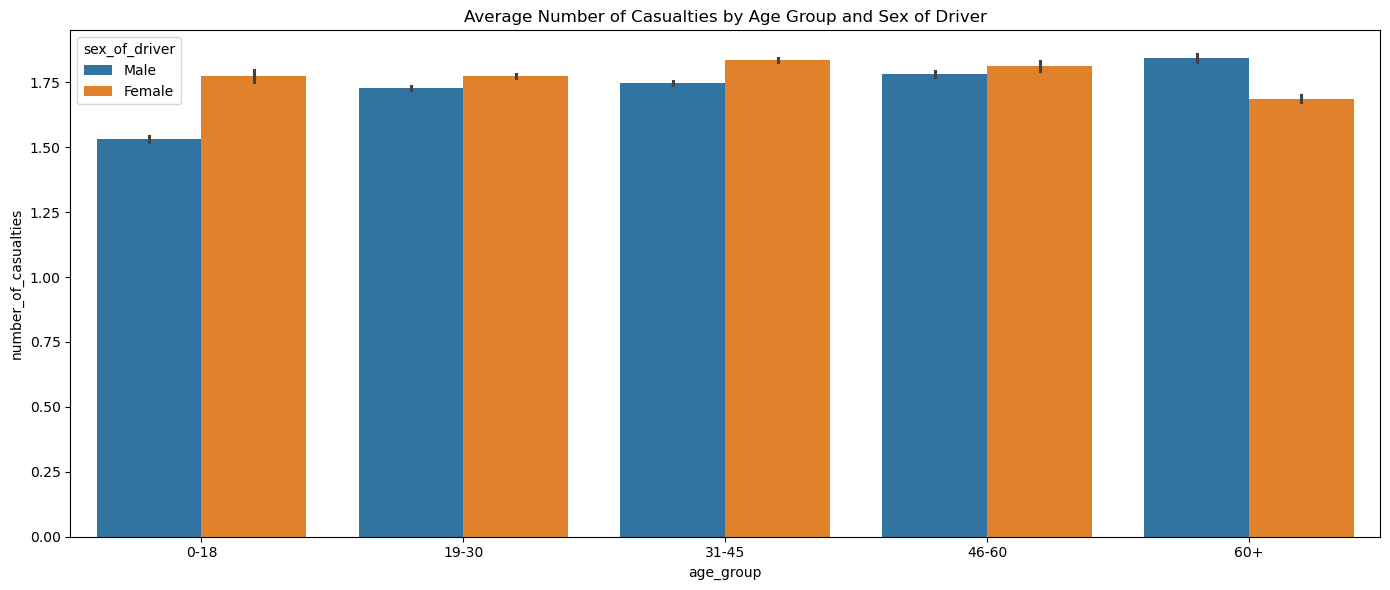

In [100]:
# Filter the data to only include Male and Female drivers
filtered_df = df_merged[df_merged['sex_of_driver'].isin(['Male', 'Female'])]

# Sort age_group in ascending order
age_order = ['0-18', '19-30', '31-45', '46-60', '60+']

# Barplot to show the average number of casualties by age group and sex of driver
fig, ax = plt.subplots(figsize=(14, 6))

sns.barplot(x='age_group', y='number_of_casualties', hue='sex_of_driver', data=filtered_df, ax=ax, order=age_order)

ax.set_title('Average Number of Casualties by Age Group and Sex of Driver')
plt.tight_layout()
plt.show()
